In [21]:
import pandas as pd
from bs4 import BeautifulSoup

from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
import re
import unicodedata as ud

d = {ord('\N{COMBINING ACUTE ACCENT}'):None}

# Read html file
def read_file(file_path: str) -> list:
    with open(file_path, 'r') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    text = soup.get_text()
    list_words = text.replace('\n', ' ').split(' ')
    return list_words

# Preprocessing
def preprocess_text(ll: list) -> list:
    ll = [word for word in ll if word != '']
    ll = [word.lower() for word in ll]
    ll = [word.replace('\xa0', ' ') for word in ll]
    ll = [re.sub(r'[^\w\s]', '', word) for word in ll]
    ll = [re.sub(r'\d+', '', word) for word in ll]
    ll = [word for word in ll if word != '']
    ll = [w for w in ll if not w.isascii()]  # Remove english words (I hope)
    ll = [ud.normalize('NFD',l).translate(d) for l in ll] # remove accents , maybe use in annotate script 
    return ll

list_words = read_file('./final_dataset/1056.html')
list_words = preprocess_text(list_words)
script = ' '.join(list_words)

In [22]:
import os

files = os.listdir('./final_dataset')
files = [f for f in files if f.endswith('.html')]

df = pd.DataFrame(columns=['script'])
for f in files:
    list_words = read_file(f'./final_dataset/{f}')
    list_words = preprocess_text(list_words)
    script = ' '.join(list_words)
    df.loc[f] = script    

df.sort_index(inplace=True)

In [23]:
decisions = pd.read_csv('./annotated_dataset.csv')    
decisions.drop('Unnamed: 0', axis=1, inplace=True)  
decisions = decisions[decisions['Decision'].isin(df.index)]
decisions.set_index('Decision', inplace=True)
decisions.sort_index(inplace=True)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

with open('./stopwords.txt', 'r') as file:
    stop_words = file.read().split('\n')
    
stop_words = preprocess_text(stop_words)

tfidf = TfidfVectorizer(min_df=5, norm='l2', stop_words=stop_words)
tfidf_matrix = tfidf.fit_transform(df['script']).toarray()

data = pd.DataFrame(tfidf_matrix, index=df.index, columns=tfidf.get_feature_names_out())
data['target'] = decisions['Label'].values

Train shape: (30, 2120) | Test shape: (15, 2120)


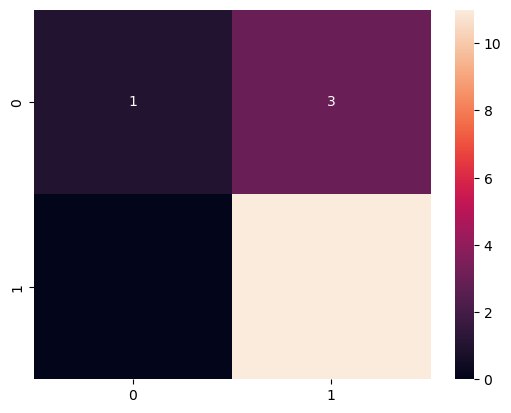

Accuracy: 0.8
MCC: 0.88


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
print(f'Train shape: {X_train.shape} | Test shape: {X_test.shape}')

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Confusion matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

print(f'Accuracy: {rf.score(X_test, y_test)}')

# Calculate MCC
from sklearn.metrics import matthews_corrcoef, f1_score

mcc = f1_score(y_test, y_pred)
print(f'MCC: {mcc}')

In [29]:
cm

array([[ 1,  3],
       [ 0, 11]])

In [30]:
y

1053.html                                 1
1056.html                                 1
1265.html                                 1
2193.html                                 1
2237.html                                 1
2530.html                                 0
2628.html                                 0
2715.html                                 1
2794.html                                 1
2797.html                                 1
5460.html                                 0
5696.html                                 0
570.html                                  1
572.html                                  1
574.html                                  1
576.html                                  0
578.html                                  0
582.html                                  1
584.html                                  0
586.html                                  0
588.html                                  0
590.html                                  1
592.html                        

In [31]:
X

,courtελλαδα,coverageeλλαδα,creatorσυμβουλιο,httpswwwprotodikeiopeirgrhttpswwwprotodikeiopeirgrp,institutionελλαδα,publisherσυμβουλιο,typeδημοσιες,typeδιαταξη,αβασιμα,αβασιμη,...,χρονο,χρονος,χρονου,χρυσουλα,χωρα,χωρας,χωρο,ων,ωρα,ωρες
1053.html,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005228,...,0.012214,0.000000,0.000000,0.000000,0.041323,0.000000,0.000000,0.008662,0.000000,0.000000
1056.html,0.000000,0.000000,0.000000,0.007117,0.000000,0.000000,0.000000,0.000000,0.008213,0.009914,...,0.038606,0.041453,0.026211,0.000000,0.008707,0.007797,0.000000,0.000000,0.000000,0.000000
1265.html,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003225,...,0.002512,0.000000,0.010231,0.000000,0.002832,0.000000,0.000000,0.000000,0.013890,0.229760
2193.html,0.000000,0.000000,0.000000,0.007826,0.000000,0.000000,0.000000,0.000000,0.000000,0.005451,...,0.072171,0.019536,0.040352,0.009032,0.009575,0.000000,0.000000,0.009032,0.000000,0.000000
2237.html,0.000000,0.000000,0.000000,0.005303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.031641,0.004412,0.003906,0.006120,0.009732,0.017427,0.009796,0.000000,0.000000,0.000000
2530.html,0.000000,0.000000,0.000000,0.009811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.021289,0.000000,0.014453,0.000000,0.030010,0.000000,0.036252,0.000000,0.000000,0.000000
2628.html,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022104,...,0.021518,0.000000,0.023374,0.000000,0.004853,0.034764,0.000000,0.045779,0.000000,0.000000
2715.html,0.000000,0.000000,0.000000,0.007845,0.000000,0.000000,0.000000,0.000000,0.000000,0.016394,...,0.029791,0.000000,0.000000,0.000000,0.004799,0.000000,0.000000,0.000000,0.000000,0.000000
2794.html,0.000000,0.000000,0.000000,0.007778,0.000000,0.000000,0.000000,0.000000,0.008976,0.005418,...,0.021096,0.000000,0.000000,0.008976,0.004758,0.017041,0.000000,0.000000,0.000000,0.000000
2797.html,0.000000,0.000000,0.000000,0.008362,0.000000,0.000000,0.000000,0.000000,0.000000,0.017473,...,0.031752,0.000000,0.000000,0.009650,0.000000,0.018321,0.000000,0.000000,0.000000,0.000000
